MovieWriter ffmpeg unavailable; using Pillow instead.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
Iteration = 1, Loss = 8985.257546669278
Iteration = 1, Loss = 1089.7249616274562
Iteration = 1, Loss = 138.22735814113943
Iteration = 1, Loss = 23.561539533006076
Iteration = 2, Loss = 9.743057962208772
Iteration = 3, Loss = 8.077777992366732
Iteration = 4, Loss = 7.877091074908842
Iteration = 5, Loss = 7.852903559195276
Iteration = 6, Loss = 7.849986142433336
Iteration = 7, Loss = 7.849632004328103
Iteration = 8, Loss = 7.849586769453977
Iteration = 9, Loss = 7.84957876103853
Iteration = 10, Loss = 7.849575239074098
Iteration = 11, Loss = 7.849572258033429
Iteration = 12, Loss = 7.849569342437526
Iteration = 13, Loss = 7.849566434985971
Iteration = 14, Loss = 7.849563528773412
Iteration = 15, Loss

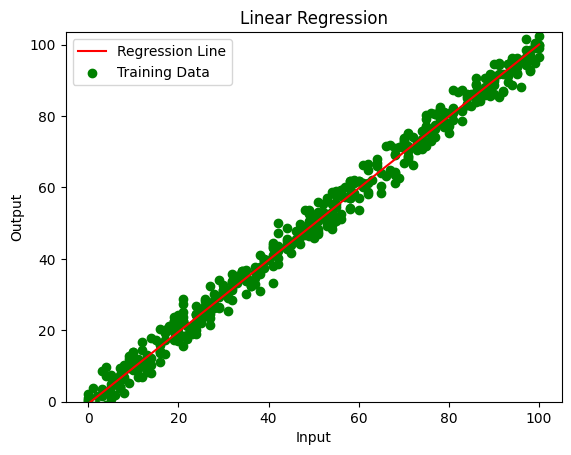

In [6]:
# Simple linear regression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
from matplotlib.animation import FuncAnimation

data_simple=pd.read_csv('./data/linear-regression/simple.csv')

data_simple.info()

data_simple=data_simple.dropna()

train_input=np.array(data_simple.x[0:500]).reshape(500,1)
train_output=np.array(data_simple.y[0:500]).reshape(500,1)

test_input = np.array(data_simple.x[500:700]).reshape(199, 1)
test_output = np.array(data_simple.y[500:700]).reshape(199, 1)

class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = [] 

        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data') 

        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss
    
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

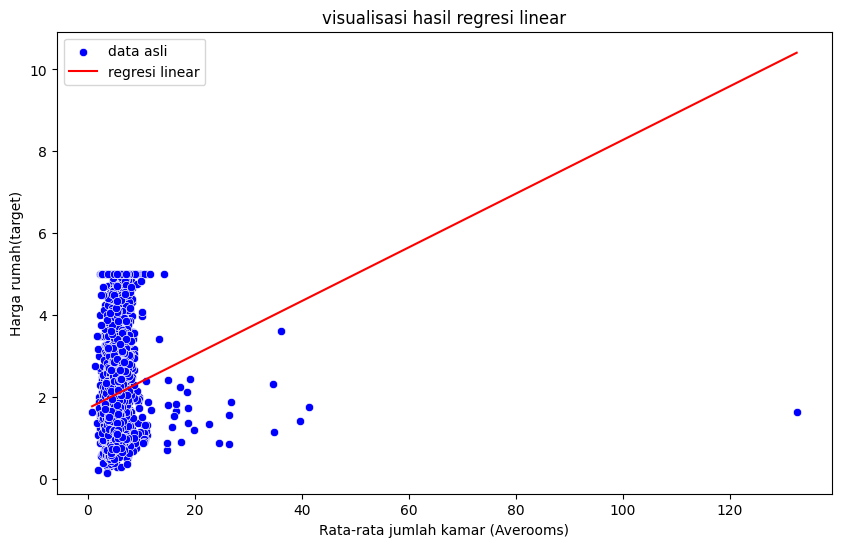

Mean Squared Error: 1.2893457720825419
Root mean squared error: 1.1355
R-squared: 0.01607376514363712


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

housing=fetch_california_housing()

X=pd.DataFrame(housing.data, columns=housing.feature_names)[["AveRooms"]]
Y=housing.target

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)


scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.fit_transform(X_test)

model=LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred=model.predict(X_test_scaled)


plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, color='blue', label="data asli")
sns.lineplot(x=X_test.values.flatten(), y=y_pred, color='red', label="regresi linear")
plt.xlabel('Rata-rata jumlah kamar (Averooms)')
plt.ylabel('Harga rumah(target)')
plt.title('visualisasi hasil regresi linear')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test, y_pred)
rmse=mse ** 0.5
r2=r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root mean squared error: {rmse:.4f}")
print(f"R-squared: {r2}")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

housing=fetch_california_housing()

# split data into X and Y

X=pd.DataFrame(housing.data, columns=housing.feature_names)
Y=housing.target

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred=model.predict(X_test_scaled)


# Make predictions.
y_pred = model.predict(X_test_scaled)


# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.5758
Mean squared error: 0.5559
Root mean squared error: 0.7456


In [ ]:
# Import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the dataset.
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)


# Compute the correlation matrix.
corr_matrix = X.corr()



# Identify pairs of features with high collinearity (correlation > 0.8 or < -0.8).
high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                     for col1 in corr_matrix.columns
                     for col2 in corr_matrix.columns
                     if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]


# Convert to a DataFrame for better visualization.
collinearity_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)


# Compute Variance Inflation Factor (VIF) for each feature.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Print VIF values.
print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)

              MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
MedInc      1.000000 -0.119034  0.326895  ...  0.018766 -0.079809  -0.015176
HouseAge   -0.119034  1.000000 -0.153277  ...  0.013191  0.011173  -0.108197
AveRooms    0.326895 -0.153277  1.000000  ... -0.004852  0.106389  -0.027540
AveBedrms  -0.062040 -0.077747  0.847621  ... -0.006181  0.069721   0.013344
Population  0.004834 -0.296244 -0.072213  ...  0.069863 -0.108785   0.099773
AveOccup    0.018766  0.013191 -0.004852  ...  1.000000  0.002366   0.002476
Latitude   -0.079809  0.011173  0.106389  ...  0.002366  1.000000  -0.924664
Longitude  -0.015176 -0.108197 -0.027540  ...  0.002476 -0.924664   1.000000

[8 rows x 8 columns]

Highly Correlated Features:
    Feature 1  Feature 2  Correlation
0   AveRooms  AveBedrms     0.847621
1  AveBedrms   AveRooms     0.847621
2   Latitude  Longitude    -0.924664
3  Longitude   Latitude    -0.924664

Variance Inflation Factor (VIF) for each feature:
       Feature     

R-squared: 0.5823
Mean squared error: 0.5473
Root mean squared error: 0.7398
Intercept: 2.071946937378881

Feature Coefficients:
       Feature  Coefficient
0      MedInc     0.708260
1    HouseAge     0.123406
2    AveRooms     0.045637
3  Population    -0.003305
4    AveOccup    -0.037483
5    Latitude    -0.978290
6   Longitude    -0.931742


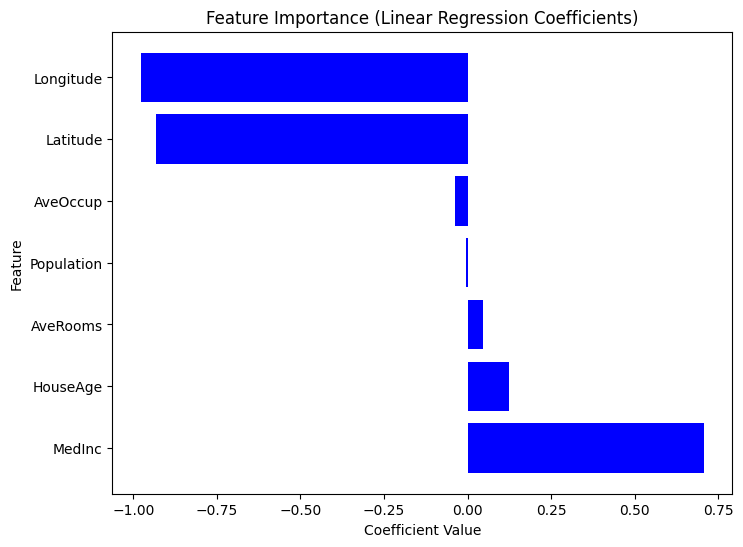

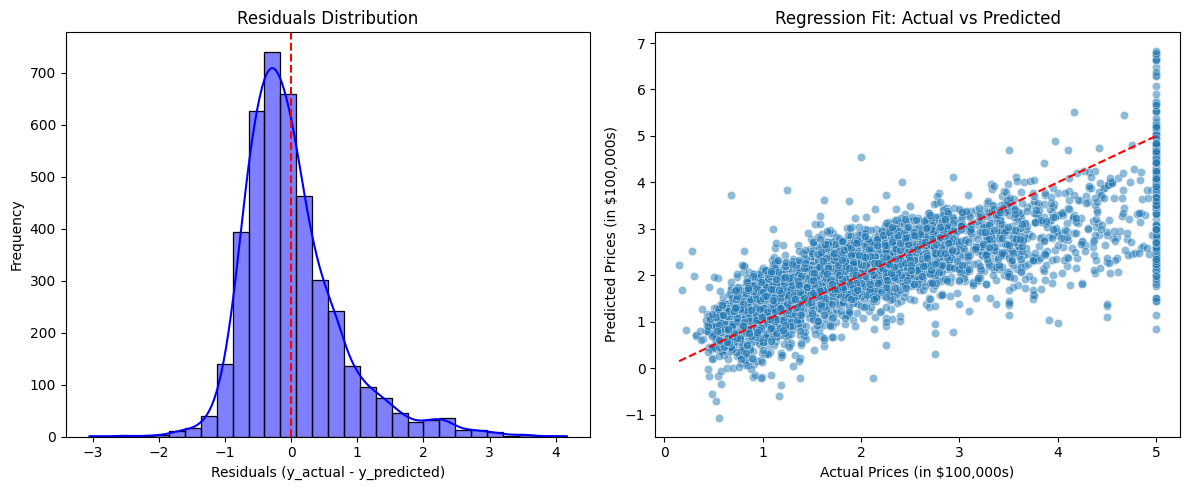

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load California housing dataset.
housing = fetch_california_housing()


# Create DataFrame and remove "AveBedrms" feature.
X = pd.DataFrame(housing.data, columns=housing.feature_names).drop(columns=["AveBedrms"])
y = housing.target  # Median house value in $100,000s


# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data (Standardization).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a linear regression model and train it.
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Make predictions on the test set.
y_pred = model.predict(X_test_scaled)


# Calculate performance metrics.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print evaluation metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")


print("Intercept:", model.intercept_)


coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coef_df)


# Sort dataframe by coefficients.
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)


# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

# Compute residuals.
residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()

R-squared: 0.6470803582413618
RMSE: 0.6800507827788168


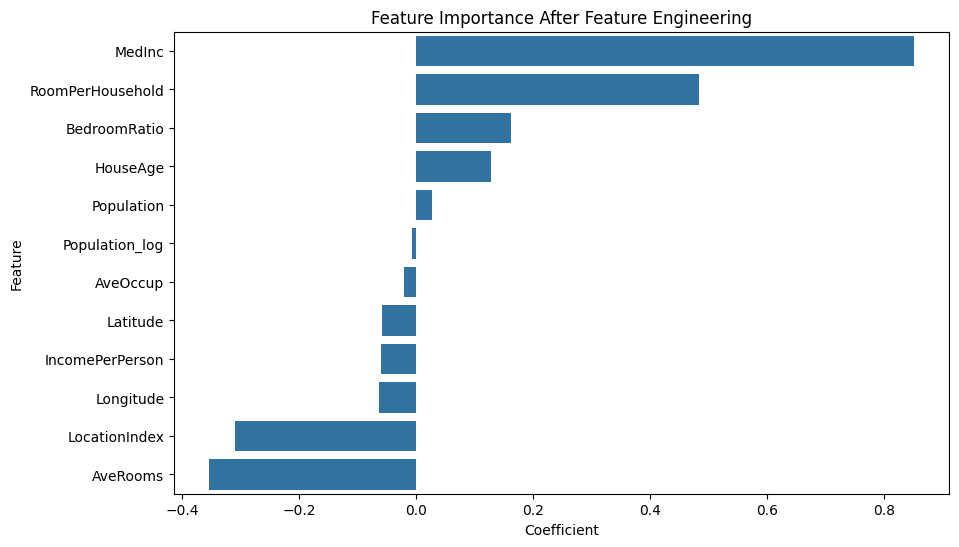

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load California housing dataset.
housing = fetch_california_housing()

# Buat DataFrame
X = pd.DataFrame(housing.data, columns=housing.feature_names)


# Feature Engineering
X['RoomPerHousehold'] = X['AveRooms'] / X['AveOccup']
X['BedroomRatio'] = X['AveBedrms'] / X['AveRooms']  # hanya jika AveBedrms belum di-drop
X['LocationIndex'] = X['Latitude'] + X['Longitude']
X['Population_log'] = np.log1p(X['Population'])
X['IncomePerPerson'] = X['MedInc'] / X['Population']

# Jika kamu drop AveBedrms sebelumnya:
X = X.drop(columns=['AveBedrms'], errors='ignore')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluasi
y_pred = model.predict(X_test_scaled)
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df_sorted)
plt.title("Feature Importance After Feature Engineering")
plt.show()



Linear Regression
CV R² Score: 0.5882 ± 0.0240
Test R² Score: 0.5868
Test RMSE: 0.7358


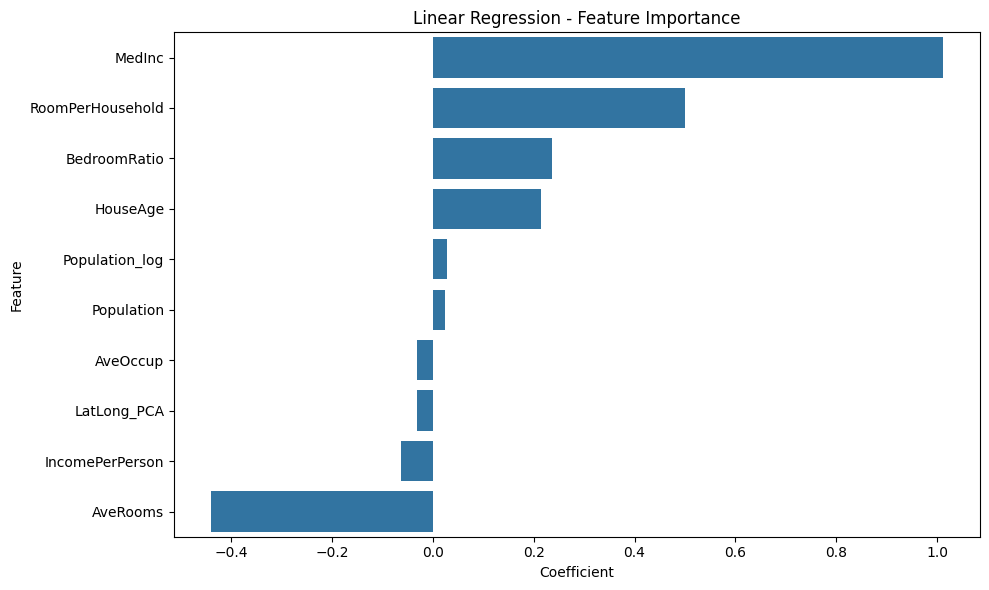


Lasso Regression
CV R² Score: -0.0003 ± 0.0004
Test R² Score: -0.0002
Test RMSE: 1.1449


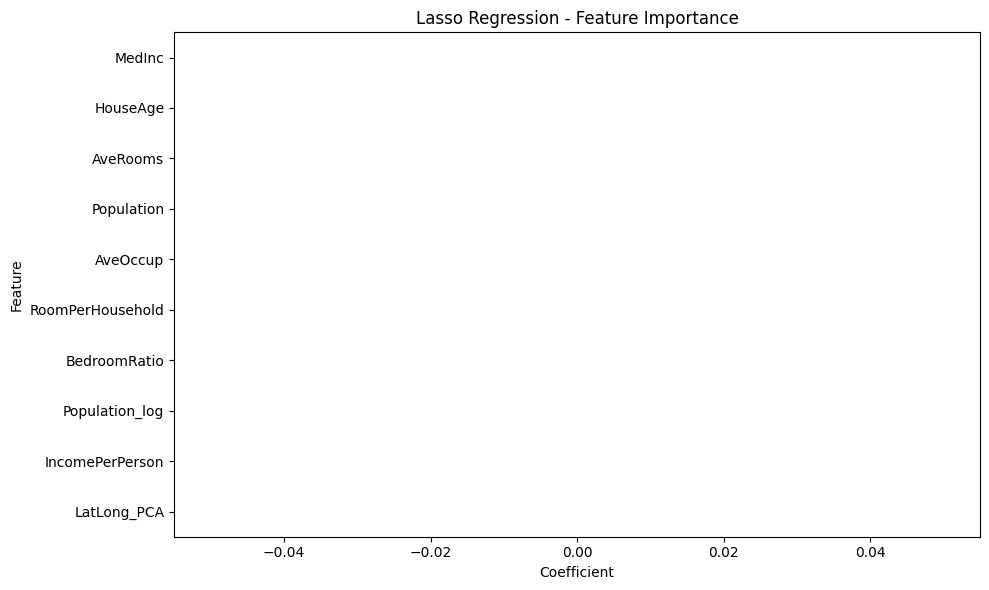


Ridge Regression
CV R² Score: 0.5882 ± 0.0240
Test R² Score: 0.5868
Test RMSE: 0.7358


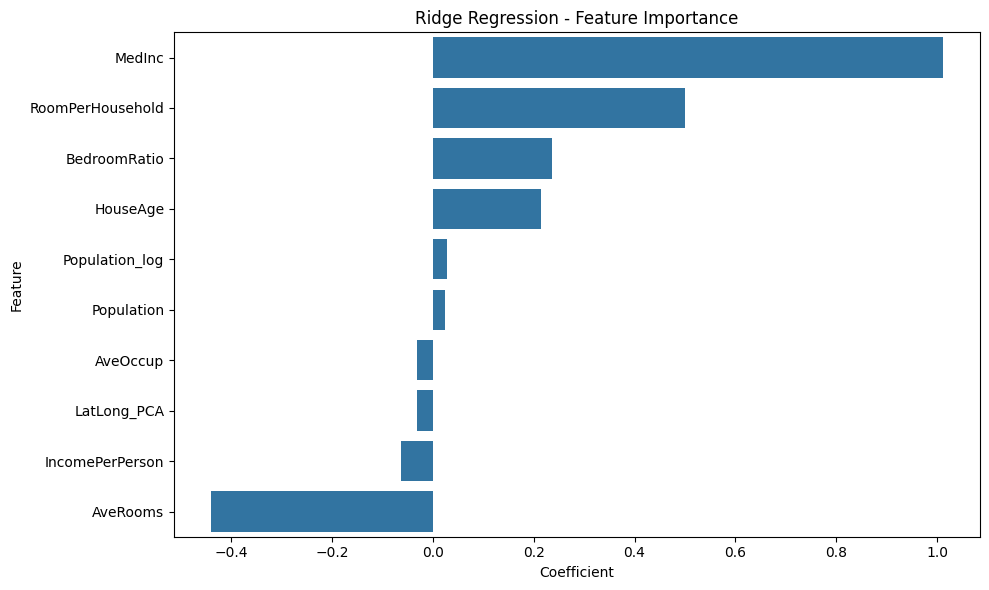



📊 Model Performance Summary:
               Model     CV R²   Test R²      RMSE
0  Linear Regression  0.588184  0.586841  0.735804
1   Lasso Regression -0.000317 -0.000219  1.144856
2   Ridge Regression  0.588201  0.586832  0.735812


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
Y = housing.target  # Median house value in $100,000s

# Feature Engineering
X['RoomPerHousehold'] = X['AveRooms'] / X['AveOccup']
X['BedroomRatio'] = X['AveBedrms'] / X['AveRooms']
X['Population_log'] = np.log1p(X['Population'])
X['IncomePerPerson'] = X['MedInc'] / X['Population']

# PCA for Latitude and Longitude
pca = PCA(n_components=1)
X['LatLong_PCA'] = pca.fit_transform(X[['Latitude', 'Longitude']])

# Drop original Latitude, Longitude, and AveBedrms
X = X.drop(columns=['Latitude', 'Longitude', 'AveBedrms'], errors='ignore')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Definitions
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=1.0),
    "Ridge Regression": Ridge(alpha=1.0)
}

results = []

# Train and evaluate each model with cross-validation
for name, model in models.items():
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5)
    scores_mse = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n{name}")
    print(f"CV R² Score: {scores_r2.mean():.4f} ± {scores_r2.std():.4f}")
    print(f"Test R² Score: {r2:.4f}")
    print(f"Test RMSE: {rmse:.4f}")

    results.append({
        "Model": name,
        "CV R²": scores_r2.mean(),
        "Test R²": r2,
        "RMSE": rmse,
        "Coefficients": model.coef_
    })

    # Coefficient Plot
    coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
    coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Coefficient", y="Feature", data=coef_df_sorted)
    plt.title(f"{name} - Feature Importance")
    plt.tight_layout()
    plt.show()

# Show all model performances
results_df = pd.DataFrame(results)
print("\n\n📊 Model Performance Summary:")
print(results_df[["Model", "CV R²", "Test R²", "RMSE"]])